<a href="https://colab.research.google.com/github/MarkNgendo/Financial-Inclusion-Analysis/blob/main/Financial%20Inclusion%20in%20East%20Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Defining the Question and Contextualizing the Analysis***

## **Research Question**


How can we predict which individuals are most likely to have or use a bank account?

## Context of the Analysis


Financial Inclusion remains one of the main obstacles to economic and human development in Africa.Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## Loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Viewing the data

In [2]:
df = pd.read_csv('Financial Dataset - 1.csv')
definitions = pd.read_csv('VariableDefinitions.csv')

df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [4]:
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [5]:
df.sample(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
2841,Kenya,2018,uniqueid_2842,No,Urban,Yes,1.0,38.0,Female,Head of Household,Single/Never Married,Vocational/Specialised training,Self employed
636,Kenya,2018,uniqueid_637,Yes,Urban,Yes,1.0,39.0,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
16705,Tanzania,2017,uniqueid_1903,Yes,Urban,Yes,1.0,32.0,Male,Head of Household,Single/Never Married,Vocational/Specialised training,Formally employed Private
2875,Kenya,2018,uniqueid_2876,No,Rural,Yes,4.0,16.0,Female,Child,Married/Living together,Primary education,Informally employed
1062,Kenya,2018,uniqueid_1063,Yes,Urban,Yes,4.0,44.0,Male,Head of Household,Married/Living together,Secondary education,Self employed


How many records are in the dataset?

In [6]:
df.shape

(23524, 13)

A description of the dataset

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,23510,4,Rwanda,8735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,23524,NaN,NaN,NaN,2016.98,0.899669,2016,2016,2017,2018,2056
uniqueid,23524,8735,uniqueid_522,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has a Bank account,23488,2,No,20179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of Location,23509,2,Rural,14338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cell Phone Access,23513,2,Yes,17449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
household_size,23496,NaN,NaN,NaN,3.68182,2.27993,0,2,3,5,21
Respondent Age,23490,NaN,NaN,NaN,38.8043,16.52,16,26,35,49,100
gender_of_respondent,23490,2,Female,13859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The relathip with head,23520,6,Head of Household,12829,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

### Completeness

In [8]:
# checking for null values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

The null values cannot be imputed and collectively dropping them remains to be the best option. It also does not impact the dataset size drastically.

In [9]:
df.dropna(inplace=True)

# resetting the index after dropping the null values

df.reset_index(inplace=True, drop=True)

In [10]:
# records left

df.shape

(23343, 13)

### Consistency

In [11]:
# Checking for duplicates

df.duplicated().sum()

0

### Accuracy

In [12]:
# Renaming columns

df.rename(columns = {'Has a Bank account': 'account_holder', 'Type of Location': 'location', 'Cell Phone Access': 'phone_access',
          'Respondent Age': 'age', 'gender_of_respondent': 'gender', 'The relathip with head': 'rship_w/head', 'Level of Educuation': 'education',
          'Type of Job': 'job'}, inplace=True)

df.head()

,country,year,uniqueid,account_holder,location,phone_access,household_size,age,gender,rship_w/head,marital_status,education,job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [13]:
# Dropping unnecessary columns

df.drop(['uniqueid'], axis=1, inplace=True)
df.head()

,country,year,account_holder,location,phone_access,household_size,age,gender,rship_w/head,marital_status,education,job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


### Outliers

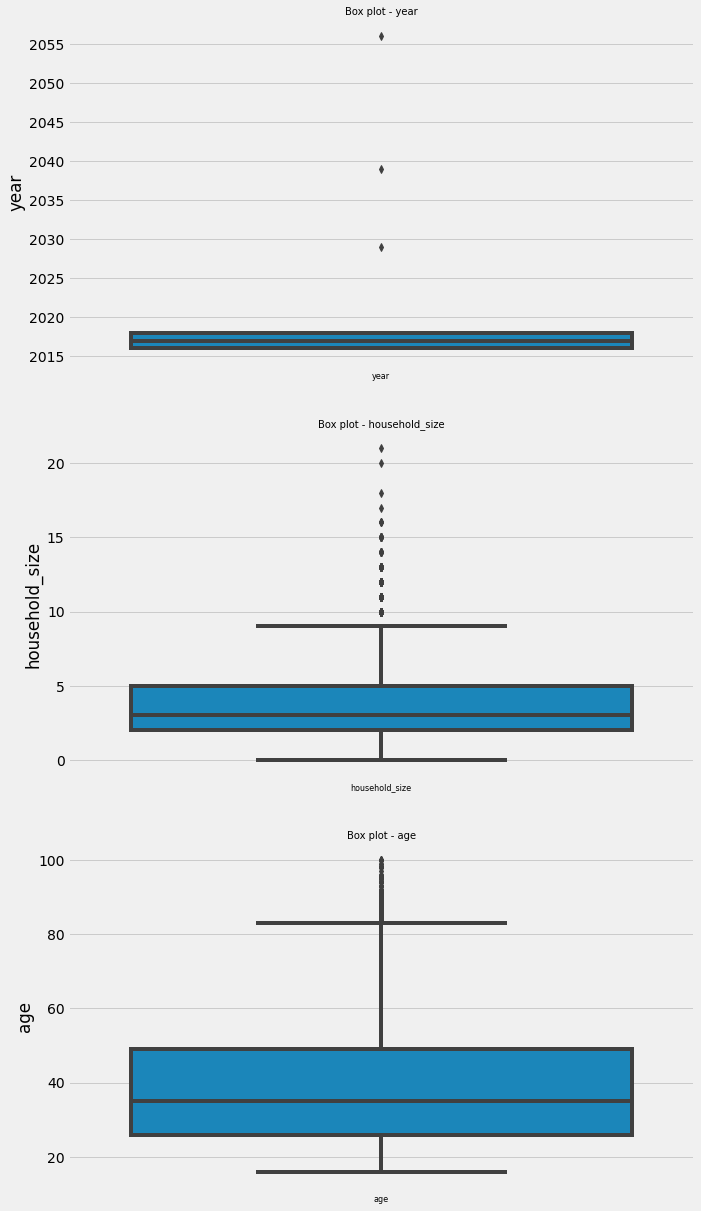

In [16]:
# Checking for Outliers 

def plot_boxplots(target_dataframe, col_names):
   fig, ax = plt.subplots(nrows = len(col_names), figsize=(10, 20))

   for i, col_name in enumerate(col_names):
     sns.boxplot(y=target_dataframe[col_name], ax=ax[i])
     ax[i].set_title('Box plot - {}'.format(col_name), fontsize=10)
     ax[i].set_xlabel(col_name, fontsize=8)


col_names = [i for i in df.describe().columns]

plt.style.use('fivethirtyeight')
plot_boxplots(df, col_names)
plt.show()

For the outliers above:

* Any year above 2020 is an anomaly
* Ages above 80 are anomalies
* Household sizes above 9 are anomalies


To deal with these, the dataset will be modified to exclude all years past 2020. The rest of the detected 'anomalies' shall be kept.



In [18]:
# Cutting down the years down to 2020 as the upper limit

df = df[df['year'] < 2020]

## Exploratory Data Analysis

### Univariate analysis

In [29]:
# Number of countries in the data

df['country'].value_counts().to_frame()

,country
Rwanda,8683
Tanzania,6500
Kenya,6062
Uganda,2095


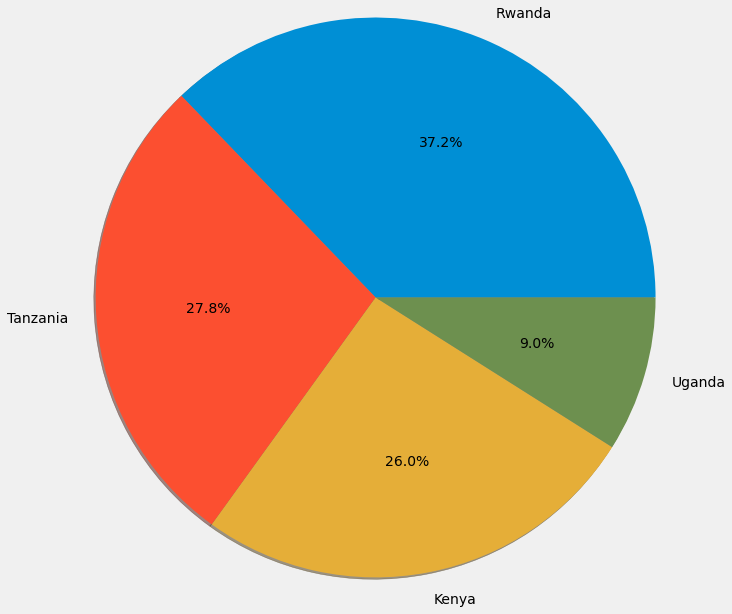

In [33]:
plt.pie(x=df['country'].value_counts(), autopct='%1.1f%%', shadow=True, labels=df['country'].value_counts().index,
        radius=3)

plt.show()

Rwanda had the highest(37.2%) number of people being interviewed while Uganda had the lowest(9%).

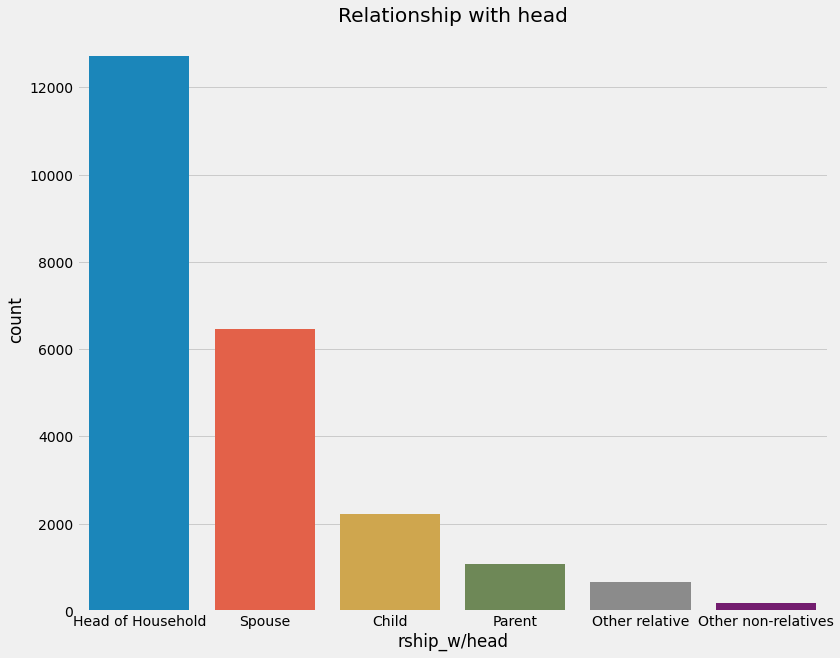

In [27]:
# Relationship with head plots
plt.figure(figsize=(12,10))
sns.countplot(x= df['rship_w/head'], order = df['rship_w/head'].value_counts().index)

plt.title('Relationship with head')

plt.show()

Most people interviewed were the heads of their households while very few lived with their non-relatives.

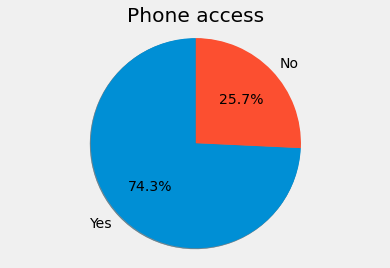

In [35]:
# Phone access visualization

plt.pie(df['phone_access'].value_counts(), 
        labels=df['phone_access'].value_counts().index,
        autopct='%1.1f%%', startangle=90, radius=3,
        shadow=True)
plt.axis('equal')
plt.title('Phone access')
plt.show()

74% of people interviewed had access to mobile phones

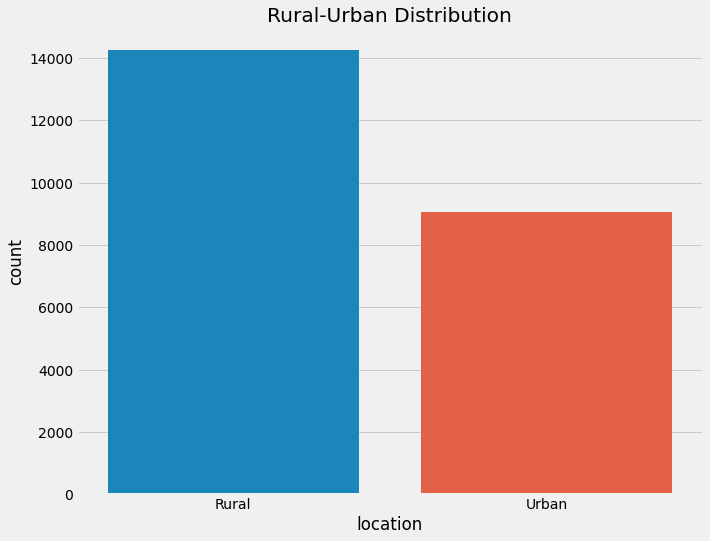

In [37]:
# Location univariate analysis

plt.figure(figsize=(10,8))

sns.countplot(x='location', data=df,  order = df['location'].value_counts().index)
plt.title('Rural-Urban Distribution')
plt.show()

Majority of individuals resided in rural areas

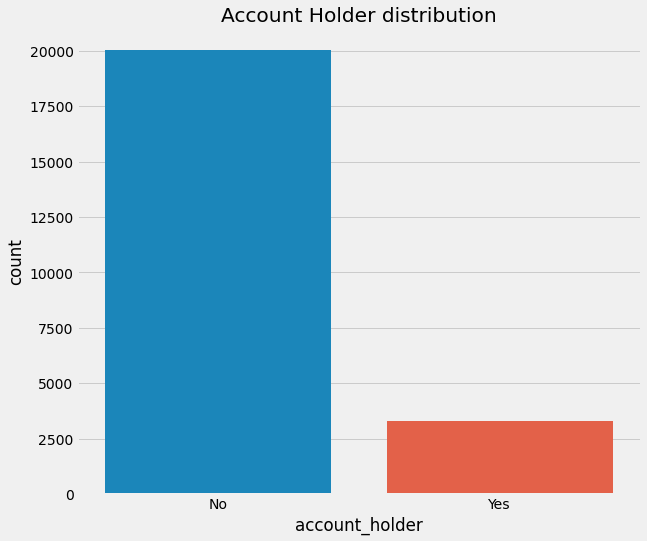

In [39]:
# Account holder univariate analysis

plt.figure(figsize=(9,8))

sns.countplot(x='account_holder', data=df, order = df['account_holder'].value_counts().index)
plt.title('Account Holder distribution')
plt.show()

Majority of the people did not have bank accounts

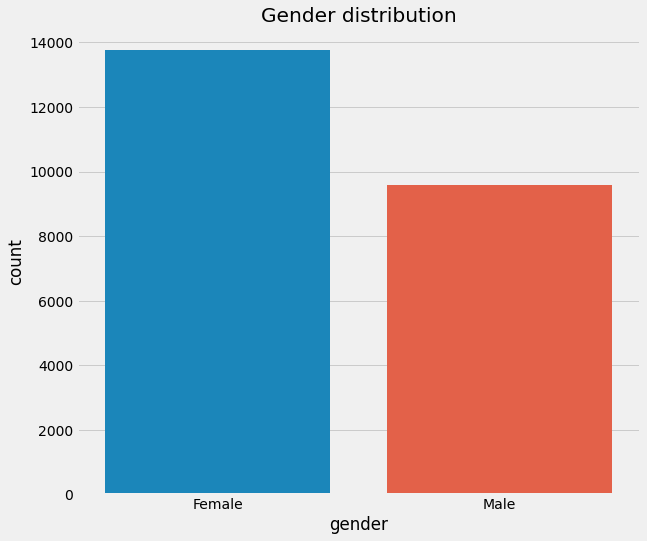

In [41]:
# Gender distribution on the dataset
plt.figure(figsize=(9,8))
sns.countplot(x= 'gender', data=df, order=df['gender'].value_counts().index)
plt.title('Gender distribution')
plt.show()

The interviews were conducted mainly on females.

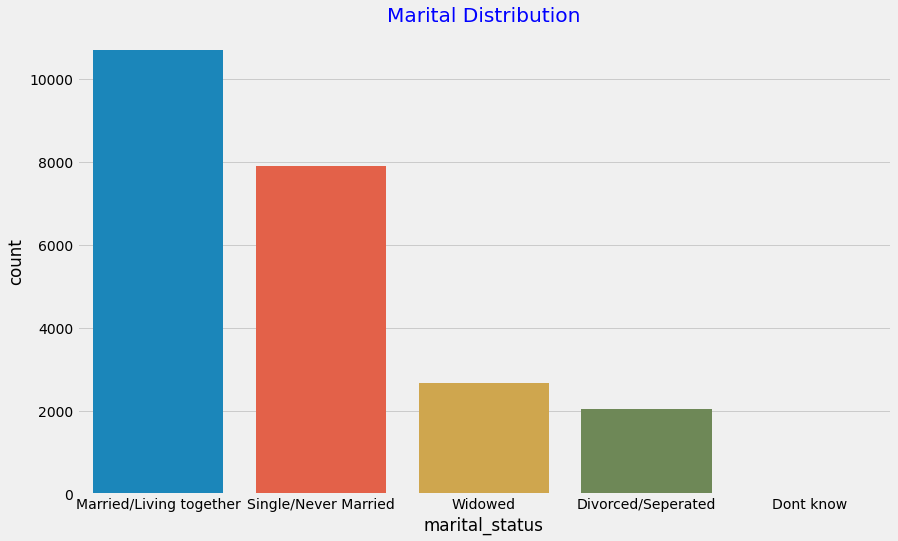

In [43]:
# Marital status of Respondents

plt.figure(figsize=(13,8))

sns.countplot(x='marital_status', data=df, order = df['marital_status'].value_counts().index)
plt.title('Marital Distribution', color='blue')
plt.show()

Most individuals in the data collected were Married/Living together with their partners. Very few individuals were separated from their partners.

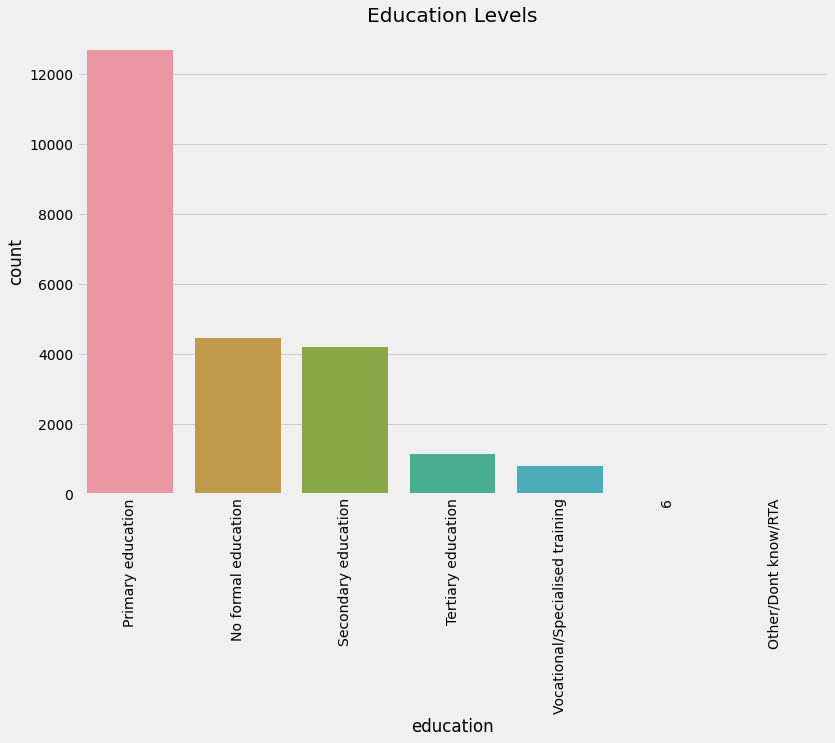

In [44]:
# Educaton Level analysis

plt.figure(figsize=(12,8))

sns.countplot(x= 'education', data=df, order = df['education'].value_counts().index)
plt.title('Education Levels')
plt.xticks(rotation=90)
plt.show()

The most common level of education amongst the interviewed individuals is Primary School level.

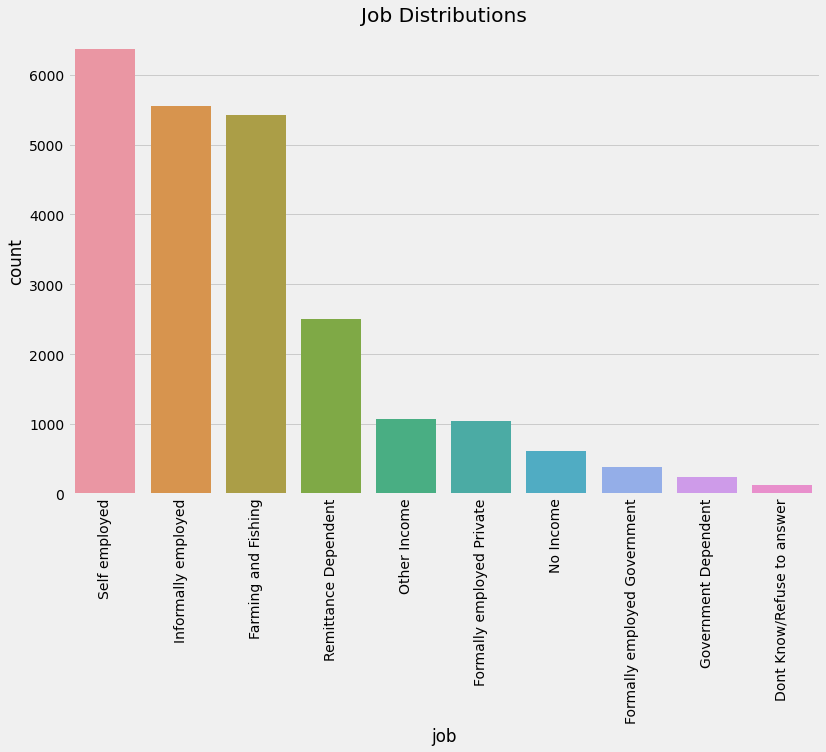

In [46]:
# Job dstribution analysis

plt.figure(figsize=(12,8))

sns.countplot(x='job', data=df, order = df['job'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Job Distributions')
plt.show()

Most individuals were self employed with majority of the rest either being Informally employed, practice Farming and Fishing or fall in the Remittance Dependent category

### Factors common to Account Holders

In [47]:
# Creating a dataset with account holders only
ac = df[df['account_holder'] == 'Yes']
ac.head()

,country,year,account_holder,location,phone_access,household_size,age,gender,rship_w/head,marital_status,education,job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,Yes,Rural,Yes,6.0,27.0,Female,Head of Household,Married/Living together,Secondary education,Self employed


In [48]:
# Employment amongst account holders

ac['job'].value_counts().to_frame()

,job
Self employed,844
Farming and Fishing,634
Formally employed Private,566
Informally employed,440
Formally employed Government,299
Remittance Dependent,240
Other Income,196
Government Dependent,50
Dont Know/Refuse to answer,14
No Income,13


Self employed people are likely to have an account.

In [49]:
# Country distribution of account holders

ac['country'].value_counts().to_frame()

,country
Kenya,1519
Rwanda,997
Tanzania,599
Uganda,181


Kenya has the highest number of account holders whereas Uganda has the least

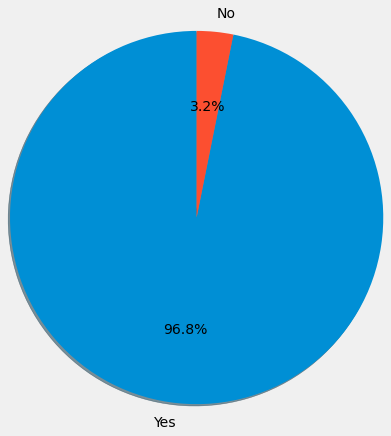

In [53]:
# Phone access of account holders

plt.pie(ac['phone_access'].value_counts().values,
        shadow=True,labels=ac['phone_access'].value_counts().index,
        startangle=90, autopct ='%1.1f%%', radius=2)

plt.show()

Nearly 97% of account holders have access to phones

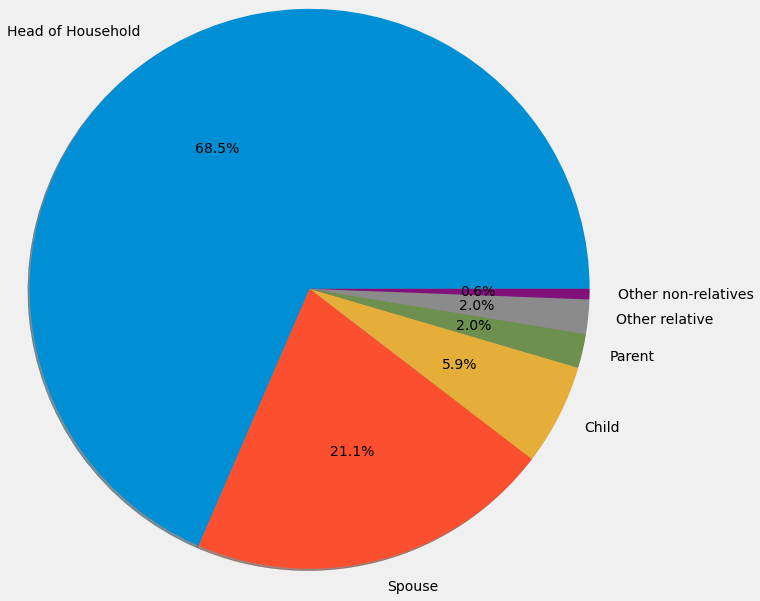

In [64]:
# relationship with head
ac['rship_w/head'].value_counts().plot(kind='pie', radius=3, autopct='%1.1f%%',
                                       shadow=True)
plt.show()

Heads of households were the highest number of people with bank accounts while Other non-relatives were the least

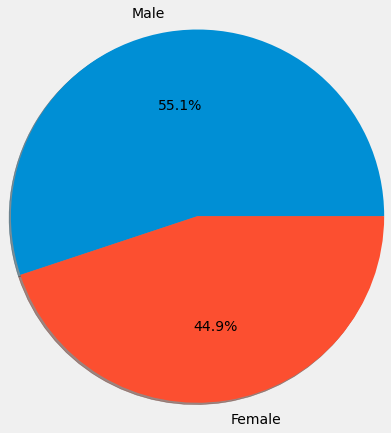

In [65]:
# Gender with bank accounts
ac['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, radius=2)
plt.show()

More males than females had bank account access by a difference of nearly 10%.

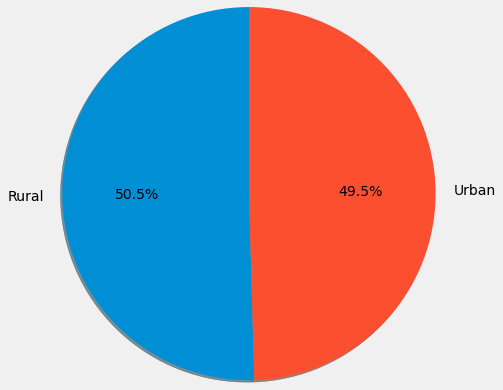

In [69]:
# location of account holders
plt.pie(ac['location'].value_counts().values,
        shadow=True,labels=ac['location'].value_counts().index,
        startangle=90, autopct ='%1.1f%%', radius=2)

plt.show()

There is almost no separation in terms of location of account holders

### Factors common to Non Account Holders

In [54]:
# dataset of people without account holders
nac = df[df['account_holder']=='No']
nac.head()

,country,year,account_holder,location,phone_access,household_size,age,gender,rship_w/head,marital_status,education,job
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed


In [56]:
# Employment amongst non account holders

nac['job'].value_counts().to_frame()

,job
Self employed,5517
Informally employed,5109
Farming and Fishing,4788
Remittance Dependent,2268
Other Income,881
No Income,605
Formally employed Private,481
Government Dependent,197
Dont Know/Refuse to answer,111
Formally employed Government,87


Out of all those without accounts, self employed people were the leading number while those formally employed by the government were the least

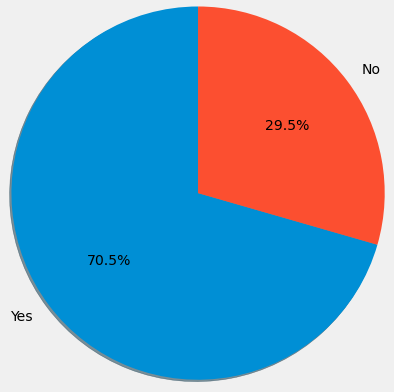

In [57]:
# Phone access amongst non account holders
plt.pie(nac['phone_access'].value_counts().values,
        shadow=True,labels=nac['phone_access'].value_counts().index,
        startangle=90, autopct ='%1.1f%%', radius=2)

plt.show()

Majority of people without accounts still had access to mobile phones

In [58]:
nac['country'].value_counts().to_frame()

,country
Rwanda,7686
Tanzania,5901
Kenya,4543
Uganda,1914


Rwanda had the highest number of people without Bank Accounts with Uganda having the least

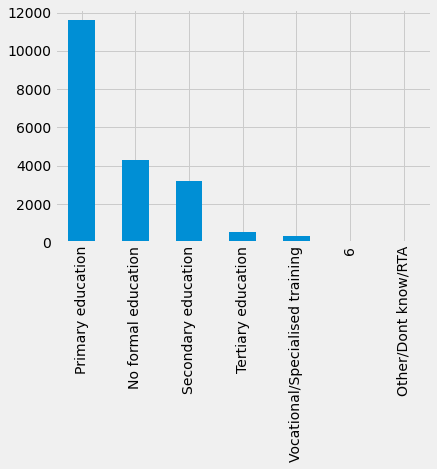

In [63]:
# education levels of those without accounts

nac['education'].value_counts().plot(kind='bar')
plt.show()

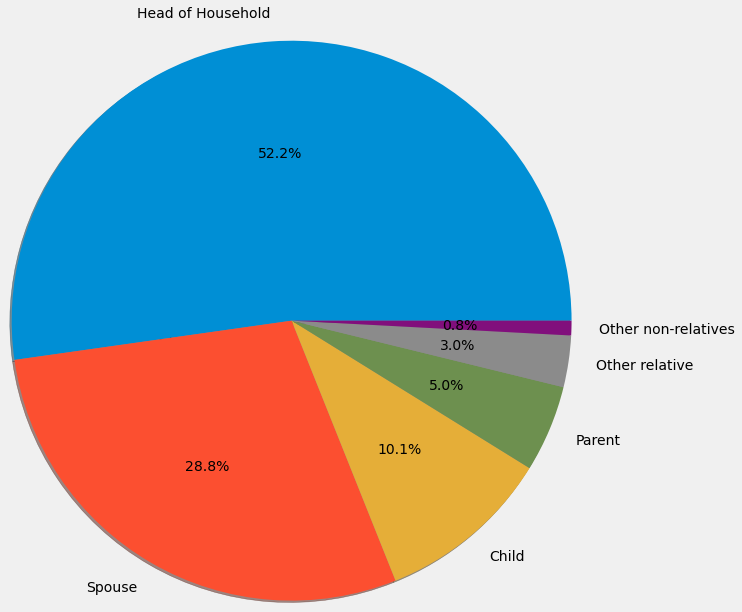

In [66]:
# relationship with head
nac['rship_w/head'].value_counts().plot(kind='pie', radius=3, autopct='%1.1f%%',
                                       shadow=True)
plt.show()

This is almost identical to the distribution shown in those with bank accounts. Heads of the households are the largest population without bank accounts with other non relatives being the smallest. However, the child and parent categories show a significant increase. This is probably due to dependency on the head of the family

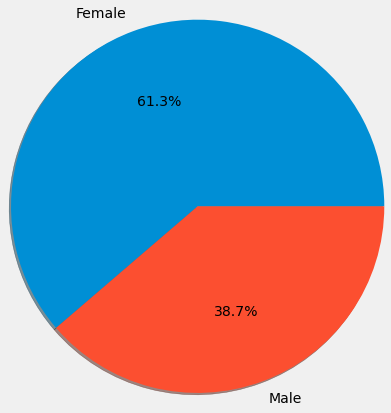

In [67]:
# gender and no bank accounts
nac['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, radius=2)
plt.show()

More females than males did not have access to bank accounts. The difference between the two categories was nearly 23% showing a clear disparity between the two.

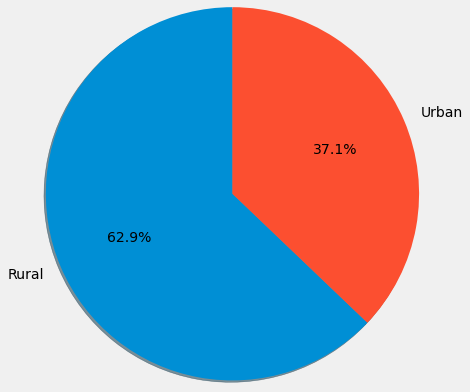

In [70]:
# location of non account holders
plt.pie(nac['location'].value_counts().values,
        shadow=True,labels=nac['location'].value_counts().index,
        startangle=90, autopct ='%1.1f%%', radius=2)

plt.show()

## **Conclusions**



1.   Kenya has the lead when it comes to how many people have accounts while Rwanda has the highest number of people without bank accounts.
2.   Self employed people are more likely to have a bank account when compared to other employment classes. They are also the leading group without bank accounts.
3.   Slightly more males than females have access to bank accounts but on the other hand, there is a significantly larger number of females without bank accounts.
4. Majority of non account holders come from Rural areas, making up 62.9% of the population.




## Recommendations

* **Location**: In order to increase Financial inclusion, there is a need to target people in Rural areas. This can be accomplished by either increasing the branches present in these areas or conducting mass education on the benefits and importance of having bank accounts.
* **Household units**: For children's sake, early reinforcement of the importance of having bank accounts could be essential in increasing the number of bank account holders in future. The other dependents like parents of heads of households can also be encouraged to have bank accounts for their pensions or passive income streams.
* **Employment type**: There is a high population of self employed people without bank accounts. Despite their independence, there is still need for financial literacy to be extended to them to prevent crippling their businesses.
* **Gender**: Women need to be encouraged not to be solely reliant on men and therefore emphasize the need of having their own savings with banks.
* **Country**: Rwanda needs mass education on financial literacy which can be as early as primary school level which was the most common level of education recorded. This can go a long way in encouraging more Rwandanese people in seeing banks as essential services.